In [ ]:
from BorutaShap import BorutaShap
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv("/home/hanping/remote file/MFB/ti.csv")

X = pd.DataFrame(df)
y = X.pop('Close')
X.head()

In [2]:
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

'''
Sample: Boolean
	if true then a rowise sample of the data will be used to calculate the feature importance values

sample_fraction: float
	The sample fraction of the original data used in calculating the feature importance values only
        used if Sample==True.

train_or_test: string
	Decides whether the feature improtance should be calculated on out of sample data see the dicussion here.
        https://slds-lmu.github.io/iml_methods_limitations/pfi-data.html

normalize: boolean
            if true the importance values will be normalized using the z-score formula

verbose: Boolean
	a flag indicator to print out all the rejected or accepted features.
'''
Feature_Selector.fit(X=X, y=y, n_trials=100, sample=False,
            	     train_or_test = 'test', normalize=True,
		     verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

7 attributes confirmed important: ['ADI', 'MACD', 'OBV', 'EMA', 'Stochastic', 'RSI', 'ATR']
0 attributes confirmed unimportant: []
0 tentative attributes remains: []


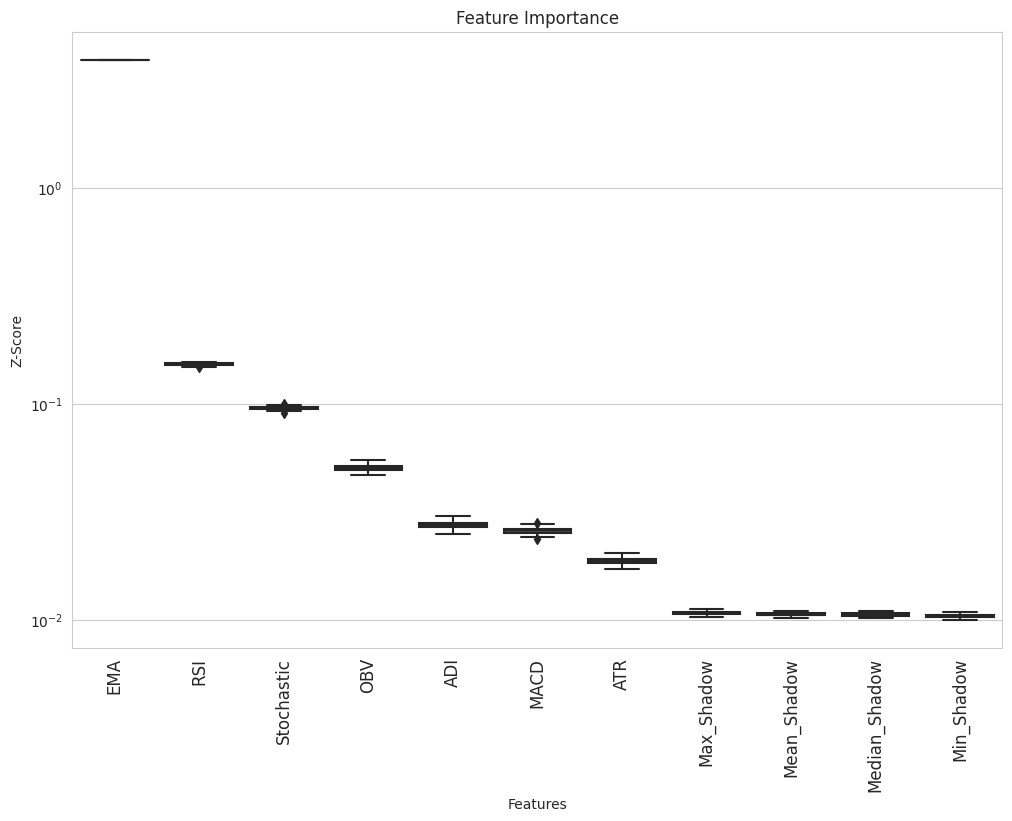

In [9]:
# Returns Boxplot of features
#Feature_Selector.plot(which_features='all', figsize=(5,5))
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [4]:
Feature_Selector.results_to_csv(filename='feature_importance')

In [10]:
# Create DataFrame of Feature Importances
def get_feature_importance_df(feature_selector, normalize=True):
    """
    Gets a DataFrame with feature names and their corresponding importance scores.
    """
    # Extract importance scores
    X_feature_import, Shadow_feature_import = feature_selector.feature_importance(normalize)

    # Combine feature names
    all_features = list(feature_selector.X.columns) + [f"shadow_{col}" for col in feature_selector.X.columns]

    # Combine importance scores
    all_importances = np.concatenate([X_feature_import, Shadow_feature_import])

    # Create and return a DataFrame
    importance_df = pd.DataFrame({
        'feature_name': all_features,
        'importance_score': all_importances
    })

    return importance_df.sort_values(by='importance_score', ascending=False)

In [11]:
# Call the function
importance_dataframe = get_feature_importance_df(Feature_Selector).reset_index(drop=True)
importance_dataframe

,feature_name,importance_score
0,EMA,3.602635
1,RSI,-0.156397
2,Stochastic,-0.217474
3,OBV,-0.260772
4,ADI,-0.285508
5,MACD,-0.285745
6,ATR,-0.292841
7,shadow_MACD,-0.300284
8,shadow_RSI,-0.300453
9,shadow_OBV,-0.300478


In [72]:
# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
import shap
def plot_feature_importances(importance_dataframe):
    """
    Plots feature importances in a descending order.
    """
    # Set the figure size
    plt.figure(figsize=(12, 8),dpi=200)

    # Create the color palette
    palette = sns.color_palette("coolwarm_r", len(importance_dataframe))

    # Barplot
    sns.barplot(data=importance_dataframe, y='feature_name', x='importance_score', palette=palette)



    # x and y labels
    plt.xlabel('Importance Score', size=22)
    plt.ylabel('Features', size=22)
    plt.tick_params(labelsize=18)

    # Display the importance score on each bar
    for index, value in enumerate(importance_dataframe['importance_score']):
        plt.text(value, index, f'{value:.2f}')

    # Display the plot
    plt.show()

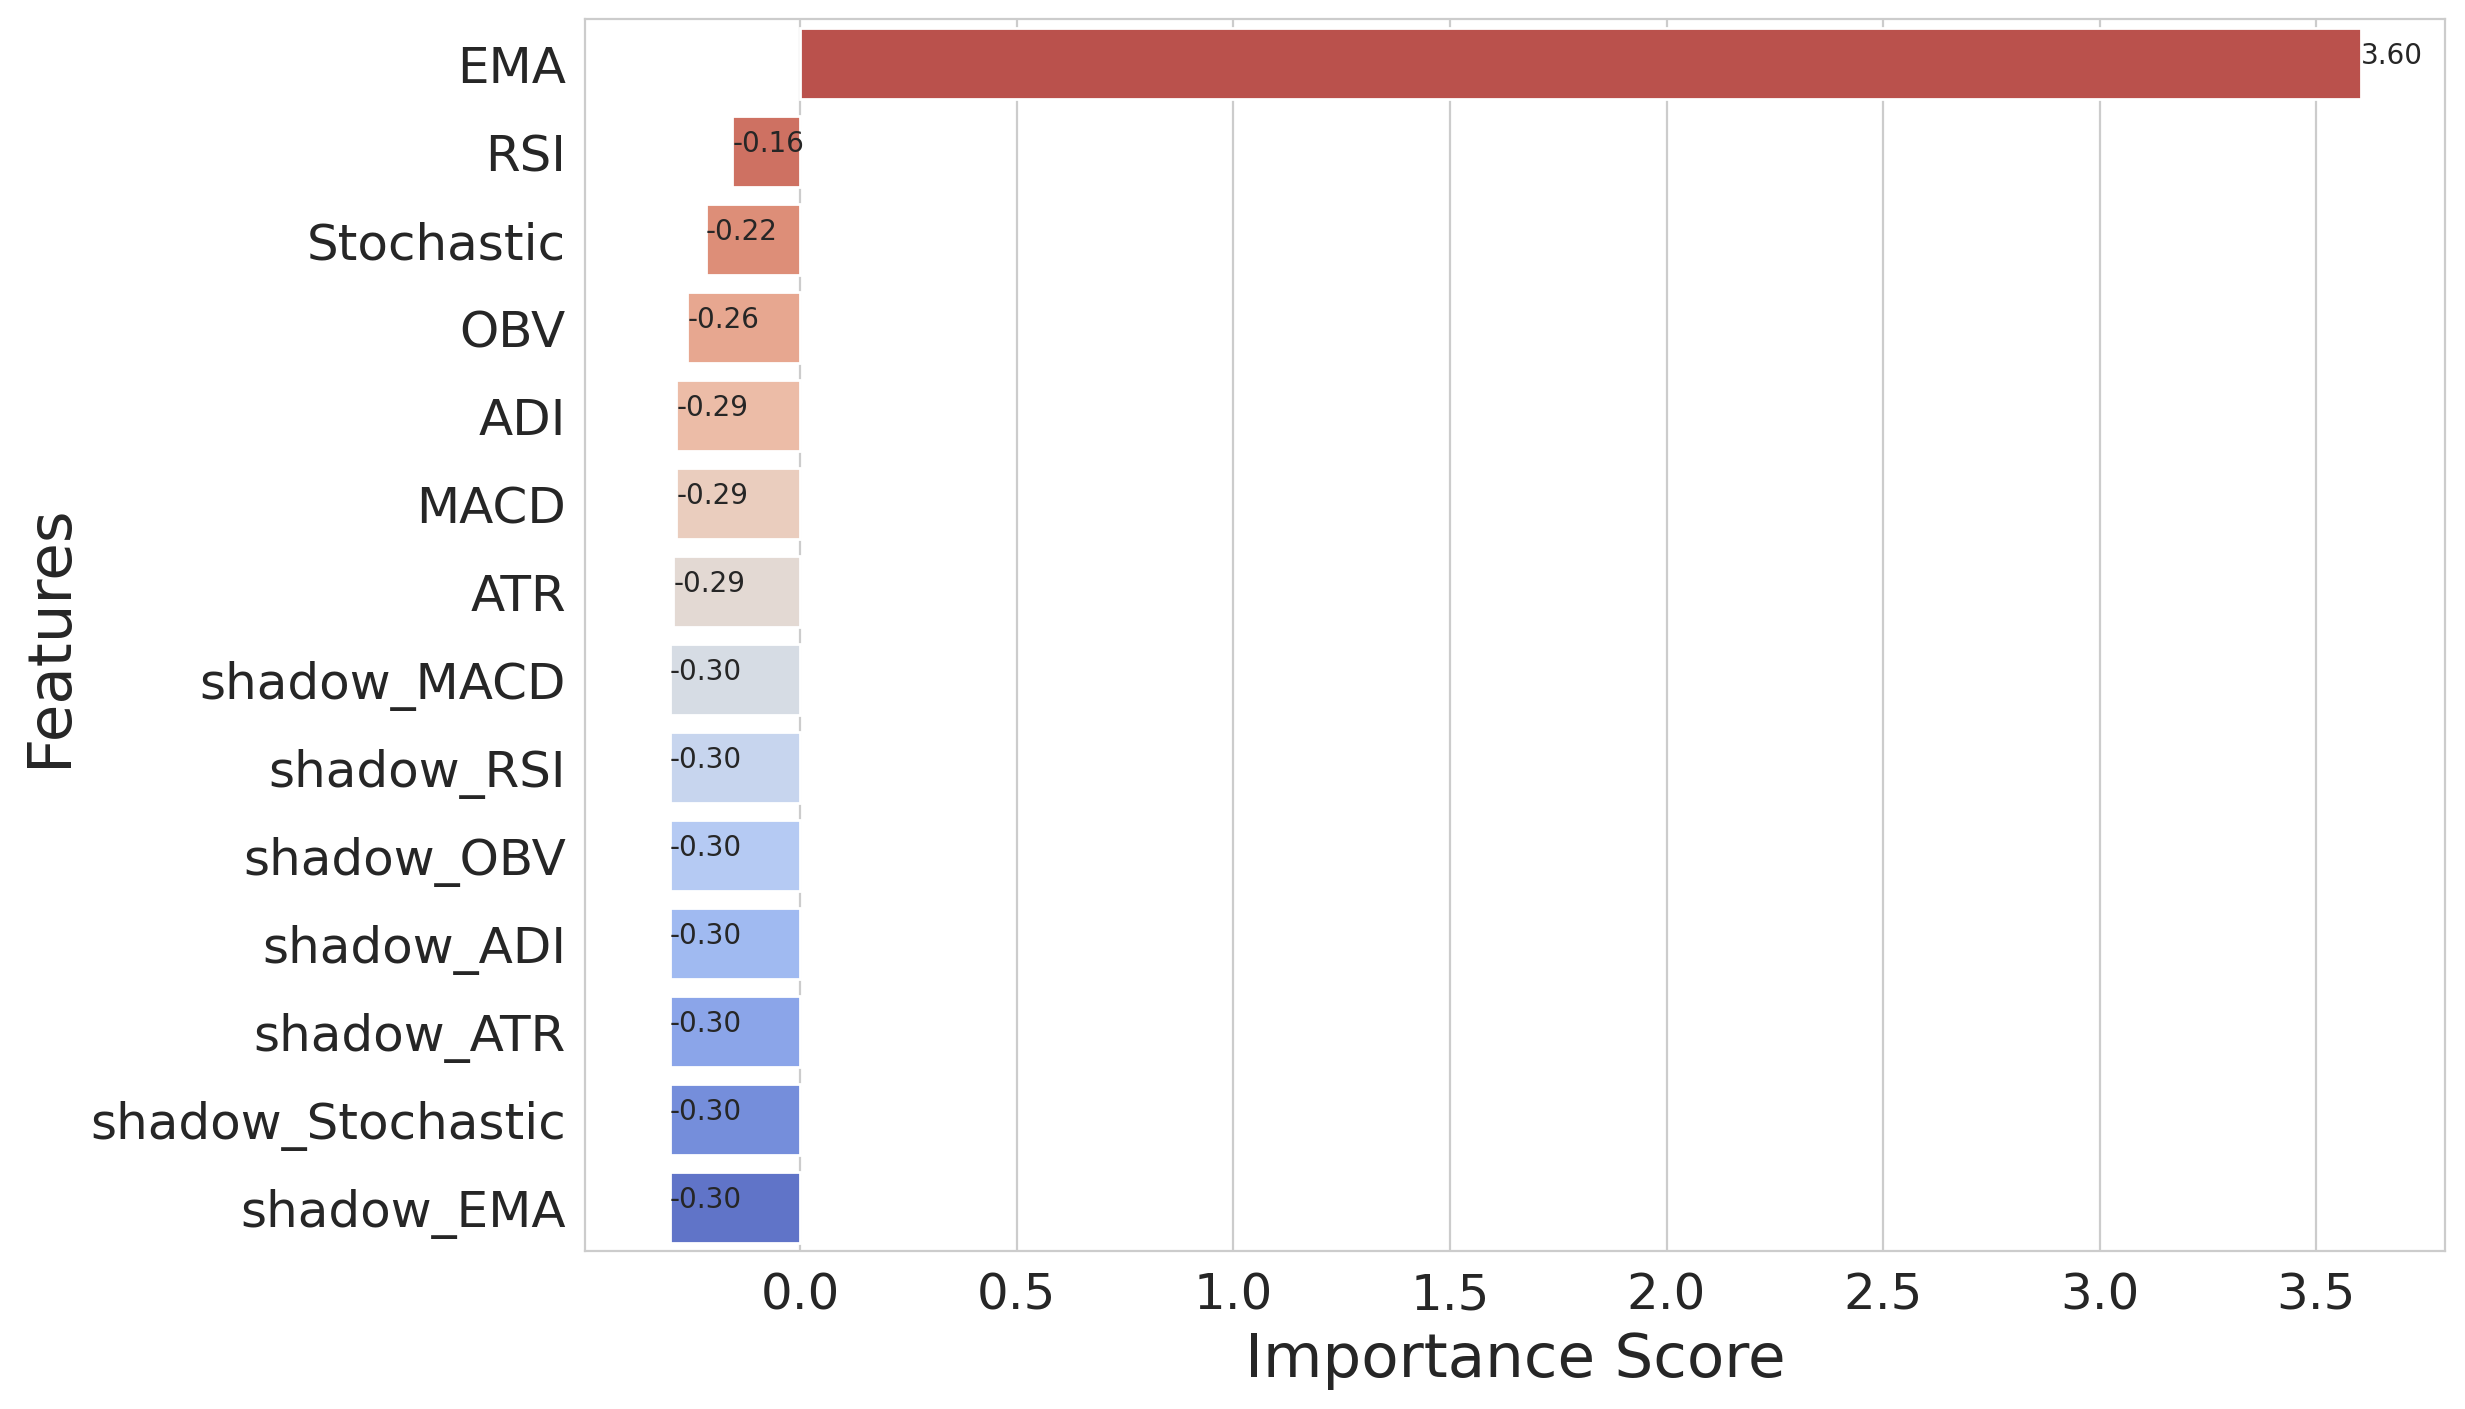

In [73]:
# Call the function
plot_feature_importances(importance_dataframe)

In [ ]:
# Initialize the explainer and shap values
Feature_Selector.explain()

In [59]:
shap_values = Feature_Selector.shap_values

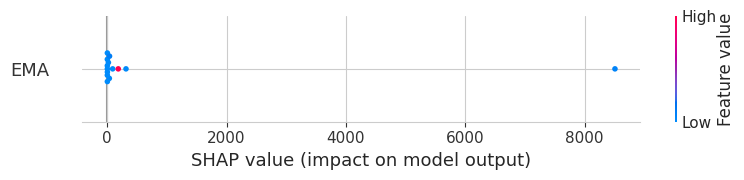

In [67]:
# Plot the shap values
shap_values_2d = np.vstack(shap_values)
X2=np.vstack(importance_dataframe.importance_score)
shap.summary_plot(shap_values_2d, X2,
                    feature_names=importance_dataframe.feature_name,
                  )

